- https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic/notebook

survival :	생존 여부	0 = 아니요, 1 = 예<br>
pclass : 티켓 등급	1 = 1st, 2 = 2nd, 3 = 3rd<br>
sex : 성	<br>
Age	: 당시 나이	<br>
sibsp :	타이타닉에 승선한 형제자매/배우자 수	<br>
parch :	타이타닉에 탑승한 부모/자녀 수	<br>
ticket : 티켓 번호	<br>
fare : 요금	<br>
cabin :	객실 번호	<br>
embarked : 승선항	C = Cherbourg, Q = Queenstown, S = Southampton<br>

# Part1 : Exploratory Data Analysis(EDA)

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data = pd.read_csv('/Users/seotaeyeong/Desktop/kaggle/titanic/data/train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
data['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

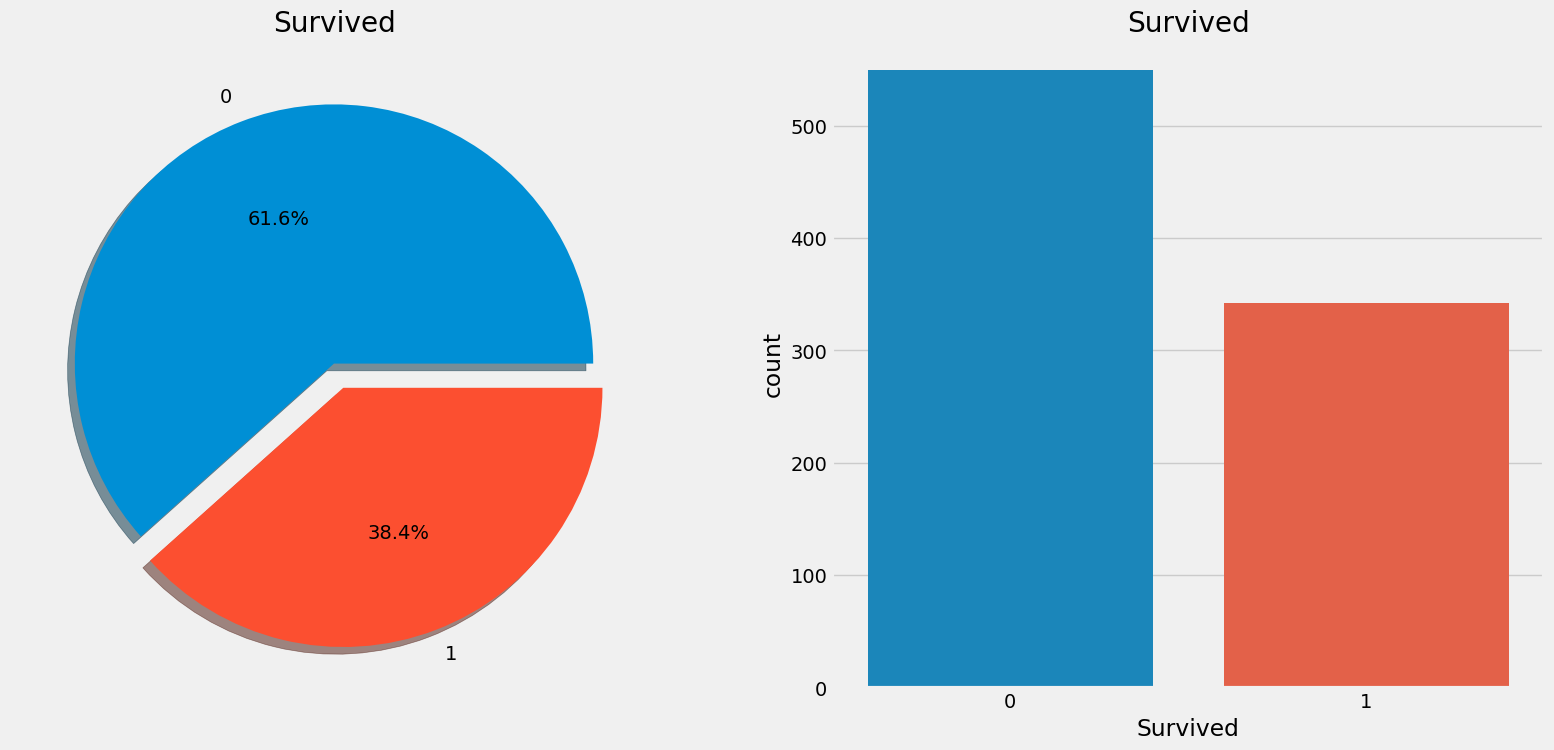

In [8]:
f, ax = plt.subplots(1,2,figsize=(18,8)) # 1행 2열로
data['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(data, x='Survived', ax = ax[1])
ax[1].set_title('Survived')
plt.show()


### Categorical Feature(범주형 변수)
- Categorical Feature는 두개 이상의 선택지가 있는, 분류 할 수 있는 Feature를 말한다.
- like gender, embarked

### Ordinal Feature(명목형 변수)
- Ordinal Feature는 Categorical Feature와 유사하지만 상대적 순서가 있고 정렬이 가능하다는 차이점이 있다.
- like height, pclass

### Continous Feature(연속형 변수)
- Continous Feature는 특정 두 지점 사이 또는 최대 최소 지점의 값을 취할 수 있는 경우이다.
- like age

# Sex -> Categorical Feature

In [9]:
# 성별 별 Survived 확인
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

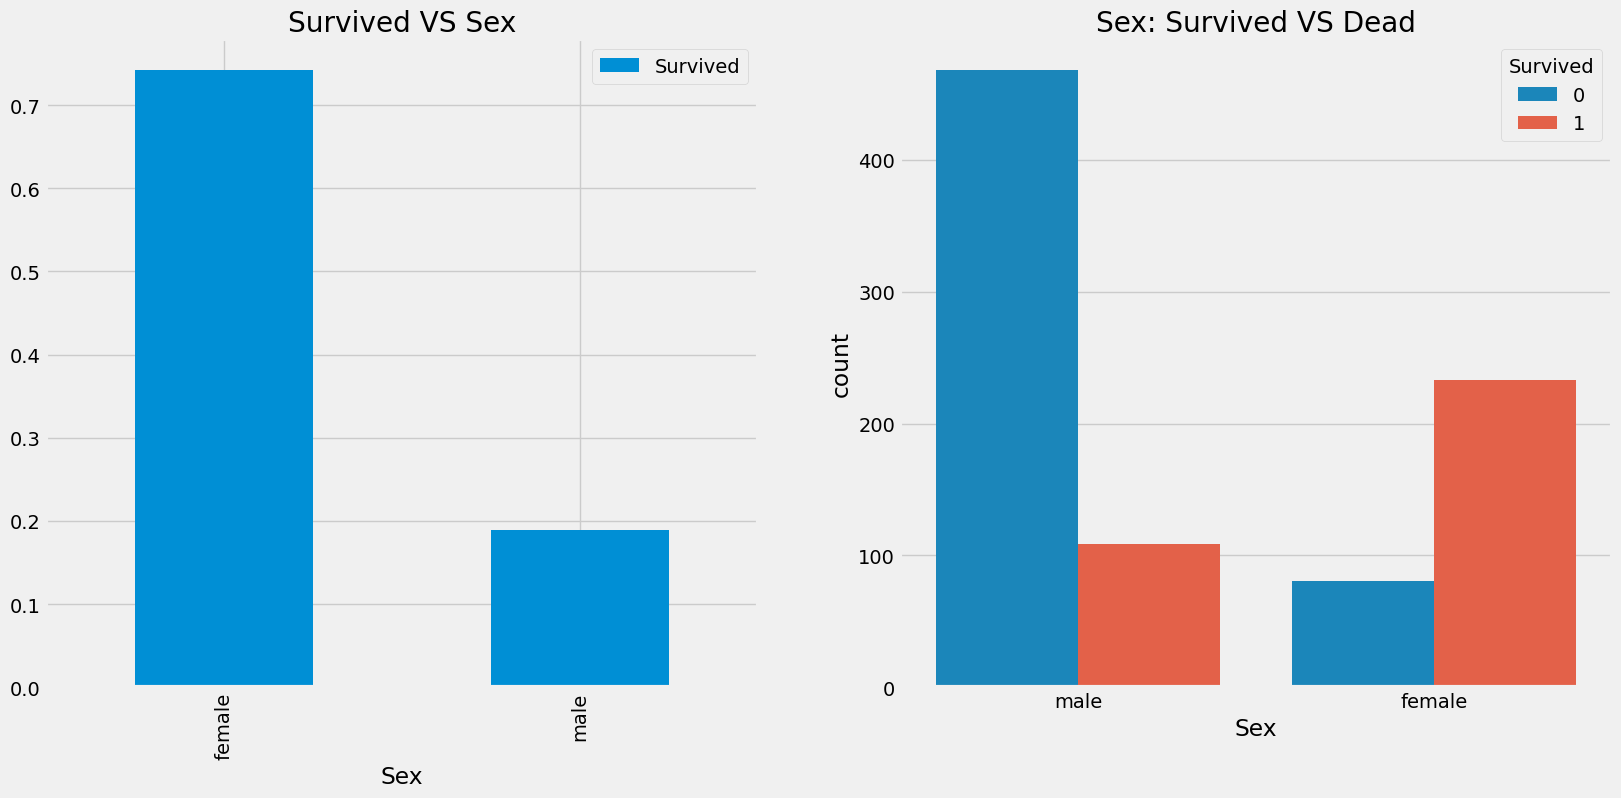

In [10]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived VS Sex')
sns.countplot(x = 'Sex', hue = 'Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Survived VS Dead')
plt.show()

# PClass -> Ordinal Feature

In [11]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


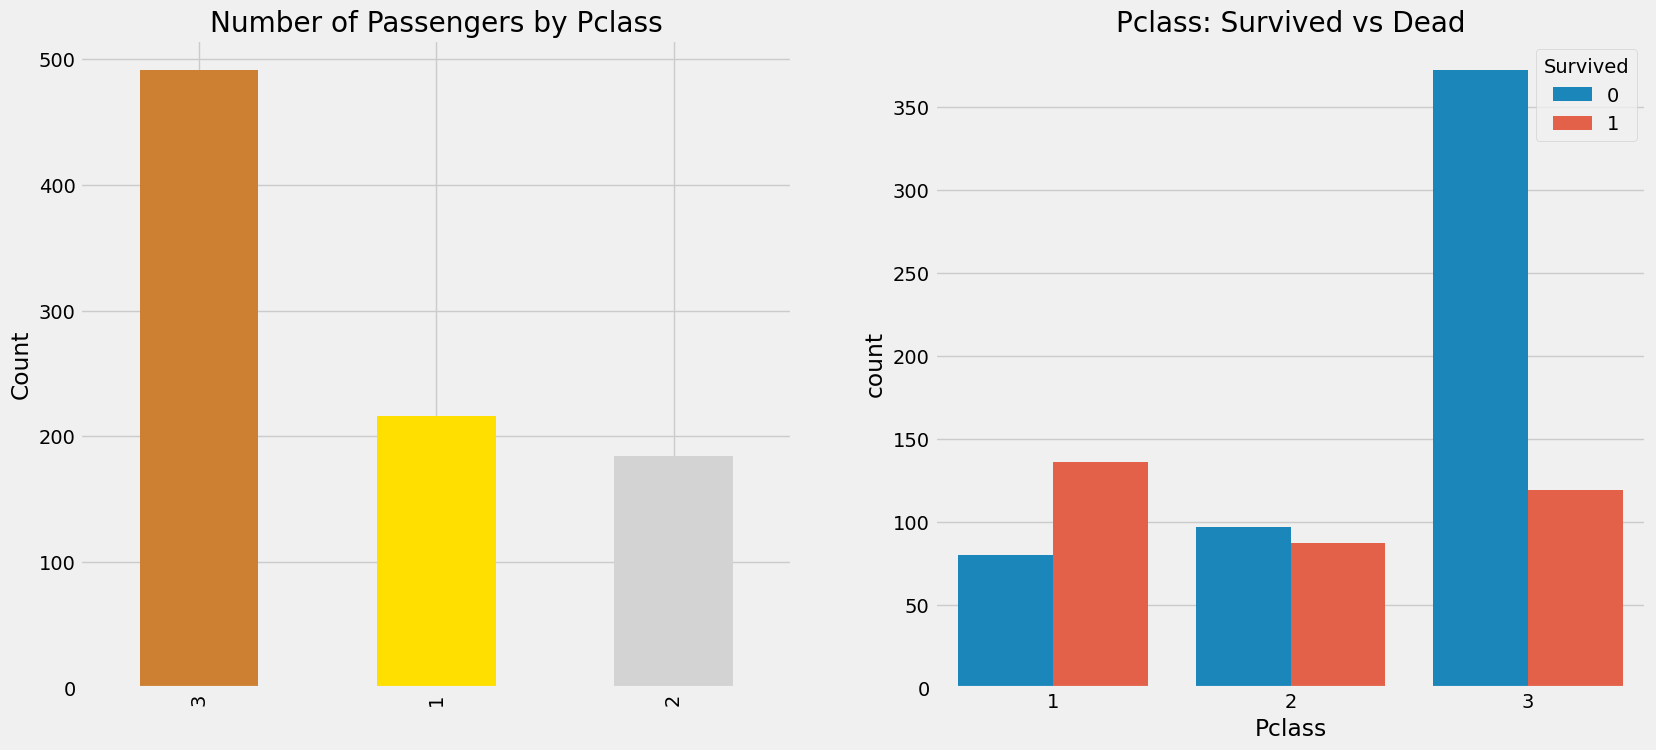

In [12]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax = ax[0])
ax[0].set_title('Number of Passengers by Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x = 'Pclass', hue = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

In [13]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

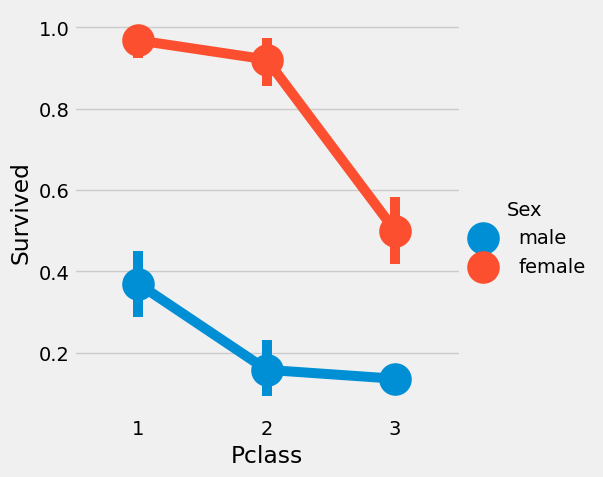

In [18]:
# factorplot이 seaborn에서 삭제됨
# seaborn 패치 노트?(22년 9월)
# 같은 기능을 catplot()을 사용하면 된다고 함
#sns.factorplot(x = 'Pclass', y ='Survived', hue='Sex', data=data)
sns.catplot(x="Pclass", y="Survived", hue="Sex", kind="point", data=data)
plt.show()

# Age -> Continous Feature

In [20]:
print('Oldest Passenger was of :', data['Age'].max(), 'Years')
print('Youngest Passenger was of :', data['Age'].min(), 'Years')
print('Average Age on the ship :', data['Age'].mean(), 'Years')

Oldest Passenger was of : 80.0 Years
Youngest Passenger was of : 0.42 Years
Average Age on the ship : 29.69911764705882 Years


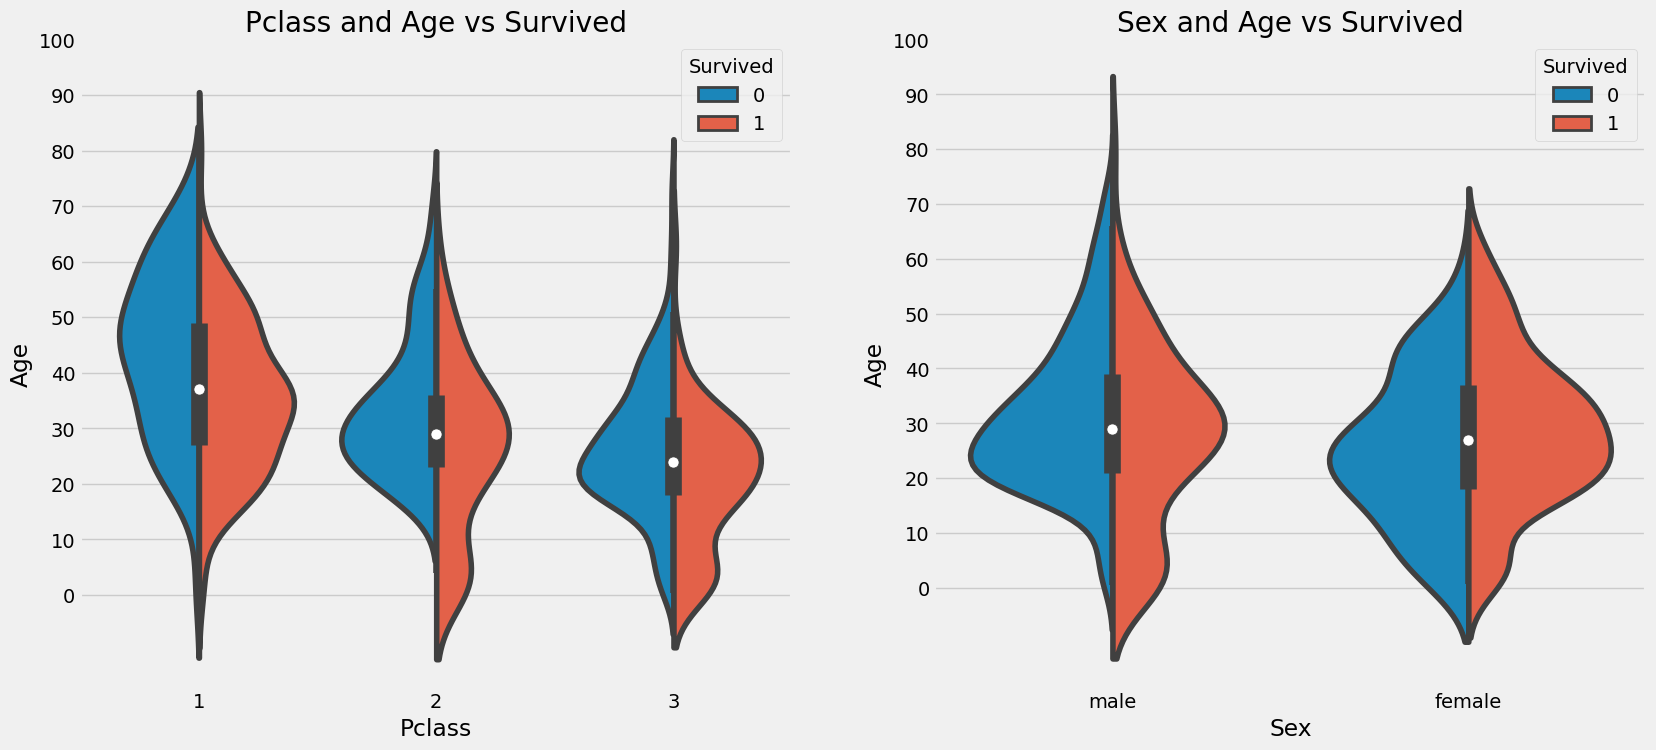

In [21]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x='Sex', y = 'Age', hue='Survived', data = data, split=True, ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

- pclass가 높아질수록(클래스가 낮아질수록) 어린이 수가 높아지는데 어린이의 생존율을 클래스와 상관없이 높다.

In [22]:
# age에 약 177개의 null 값이 존재하기에 분석이 힘듬
# 근데 평균 값을 넣을라고 하니깐 차이가 너무 커서 이름의 Mrs, Mr를 사용한다고 함
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

In [23]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [24]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [25]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [26]:
# filling Nan ages
data.loc[(data.Age.isnull()) & (data.Initial == 'Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial == "Mrs"), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial == "Master"), 'Age'] = 35
data.loc[(data.Age.isnull()) & (data.Initial == "Miss"), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial == "Other"), 'Age'] = 46

In [28]:
data.Age.isnull().any()

False

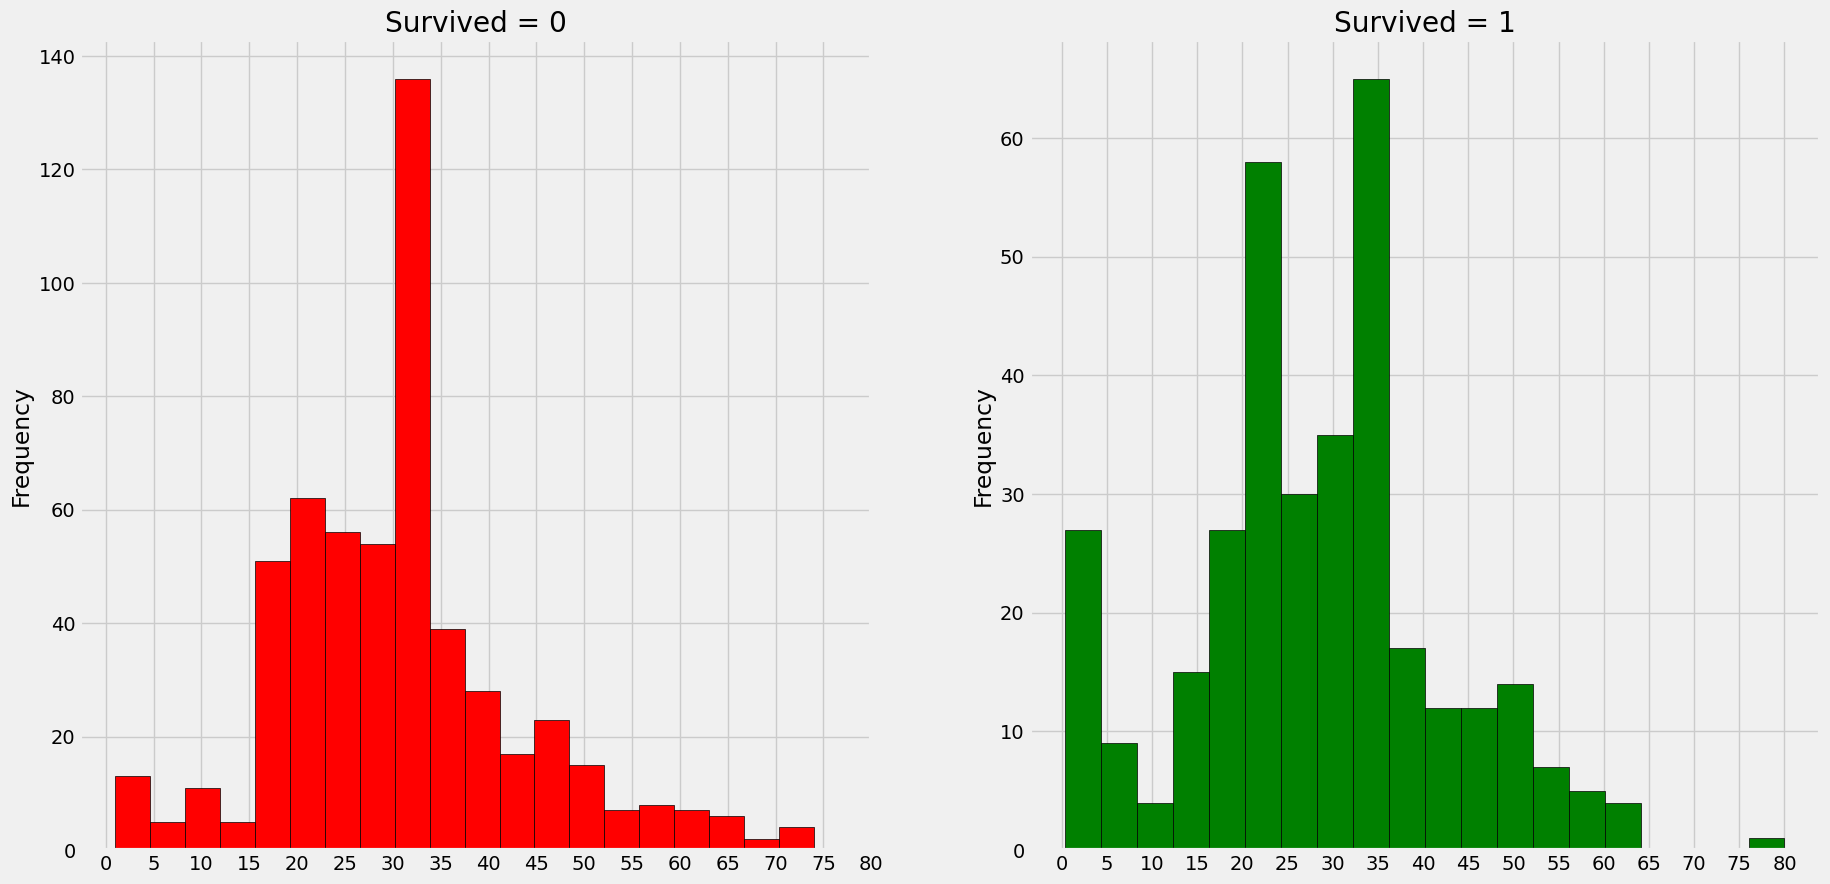

In [30]:
f,ax = plt.subplots(1,2,figsize=(20,10))
data[data['Survived'] == 0].Age.plot.hist(ax=ax[0],bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived = 0')
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived'] == 1].Age.plot.hist(ax = ax[1], color = 'green', bins=20, edgecolor='black')
ax[1].set_title('Survived = 1')
x2 = list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

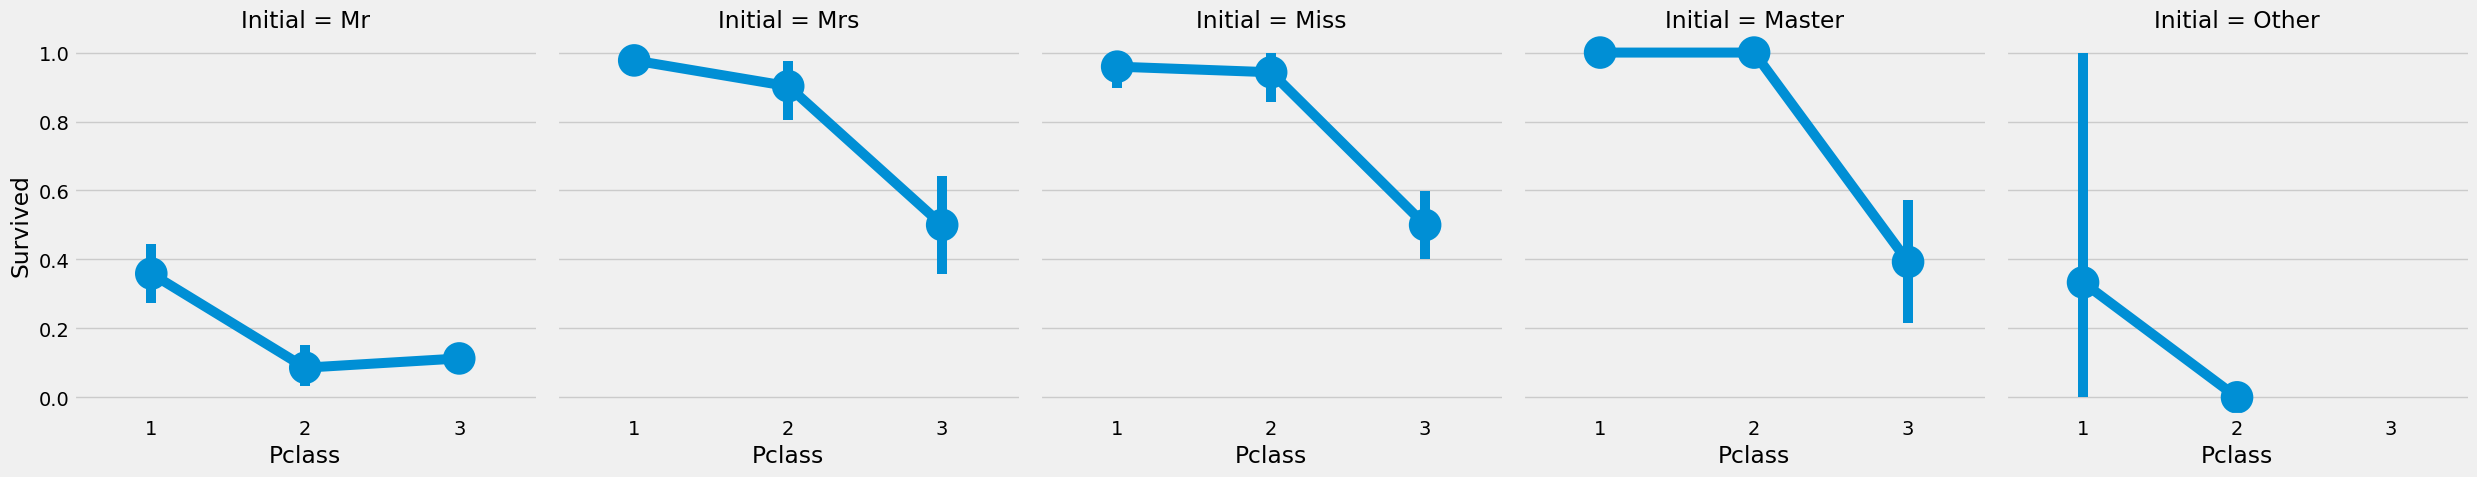

In [37]:
sns.catplot(x="Pclass", y = "Survived", col="Initial", kind="point", data=data)
plt.show()

# Embarked -> Categorical Value

In [33]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

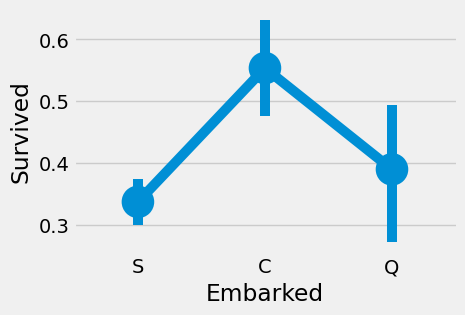

In [36]:
sns.catplot(x = "Embarked", y = "Survived", kind="point" ,data = data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

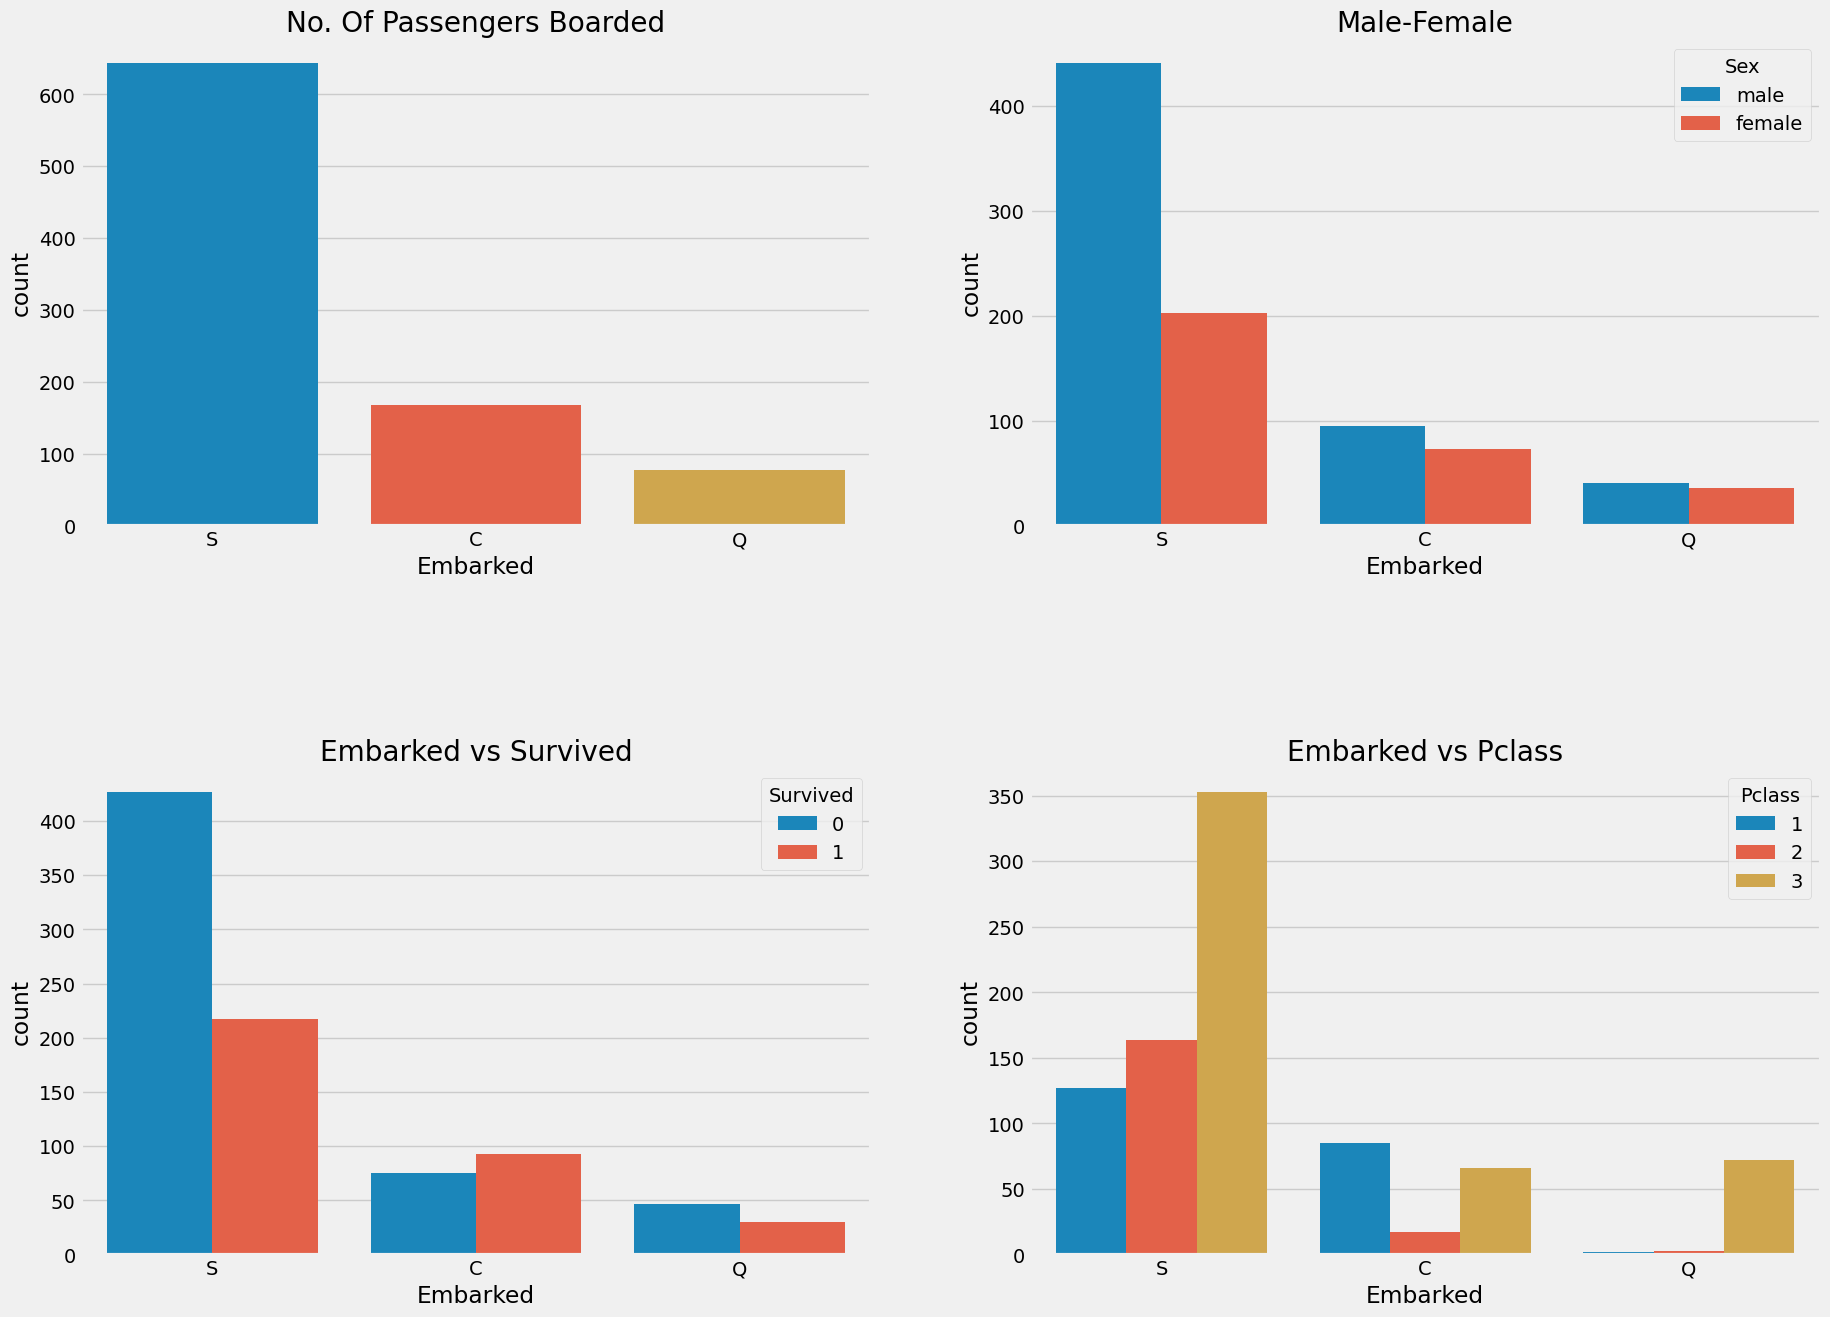

In [41]:
f, ax = plt.subplots(2,2, figsize=(20,15))
sns.countplot(x = 'Embarked', data=data, ax= ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

sns.countplot(x='Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female')

sns.countplot(x='Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot(x='Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

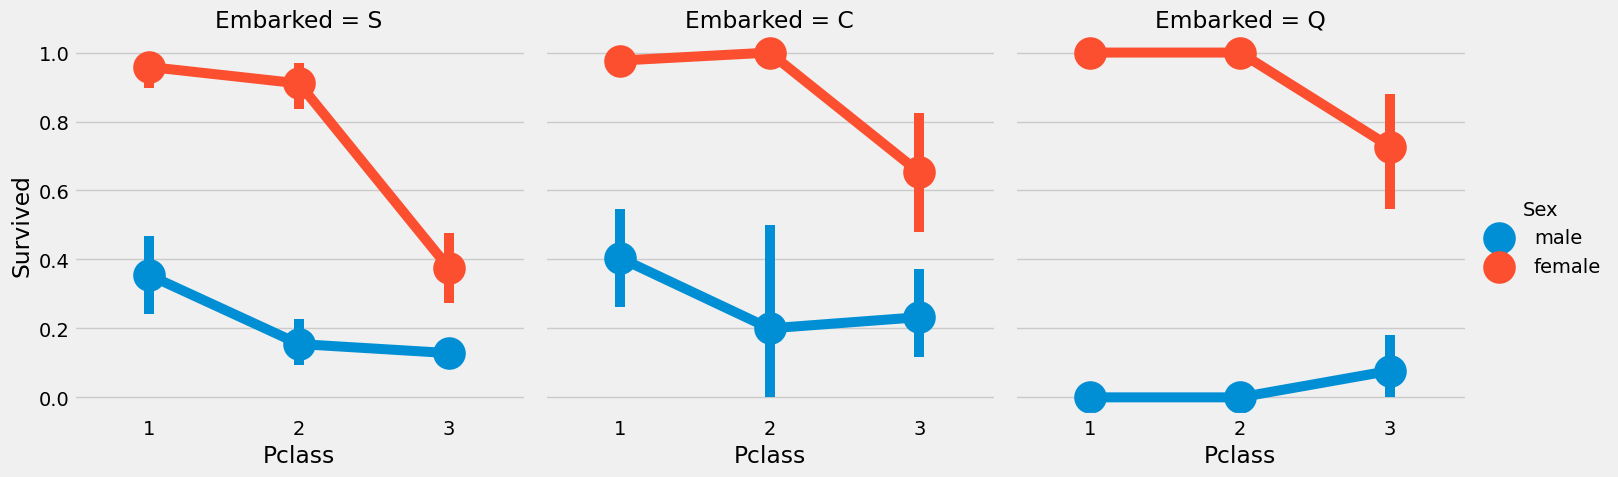

In [43]:
sns.catplot(x = "Pclass", y="Survived", hue = "Sex", col="Embarked", kind="point",data=data)
plt.show()

In [44]:
# Filling Embarked NaN
data['Embarked'].fillna('S', inplace=True) # data['Embarked']에 null 값을 s로 입력
# s로 채운 이유는 s의 수가 가장 많기 때문에 s로 채움

In [45]:
data.Embarked.isnull().any()

False

# SibSip -> Discrete Feature
- 가족과 왔는지 혼자 왔는지
- Sibsp : 형자/자매/배우자
- Parch : 부모/자녀
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife

In [46]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


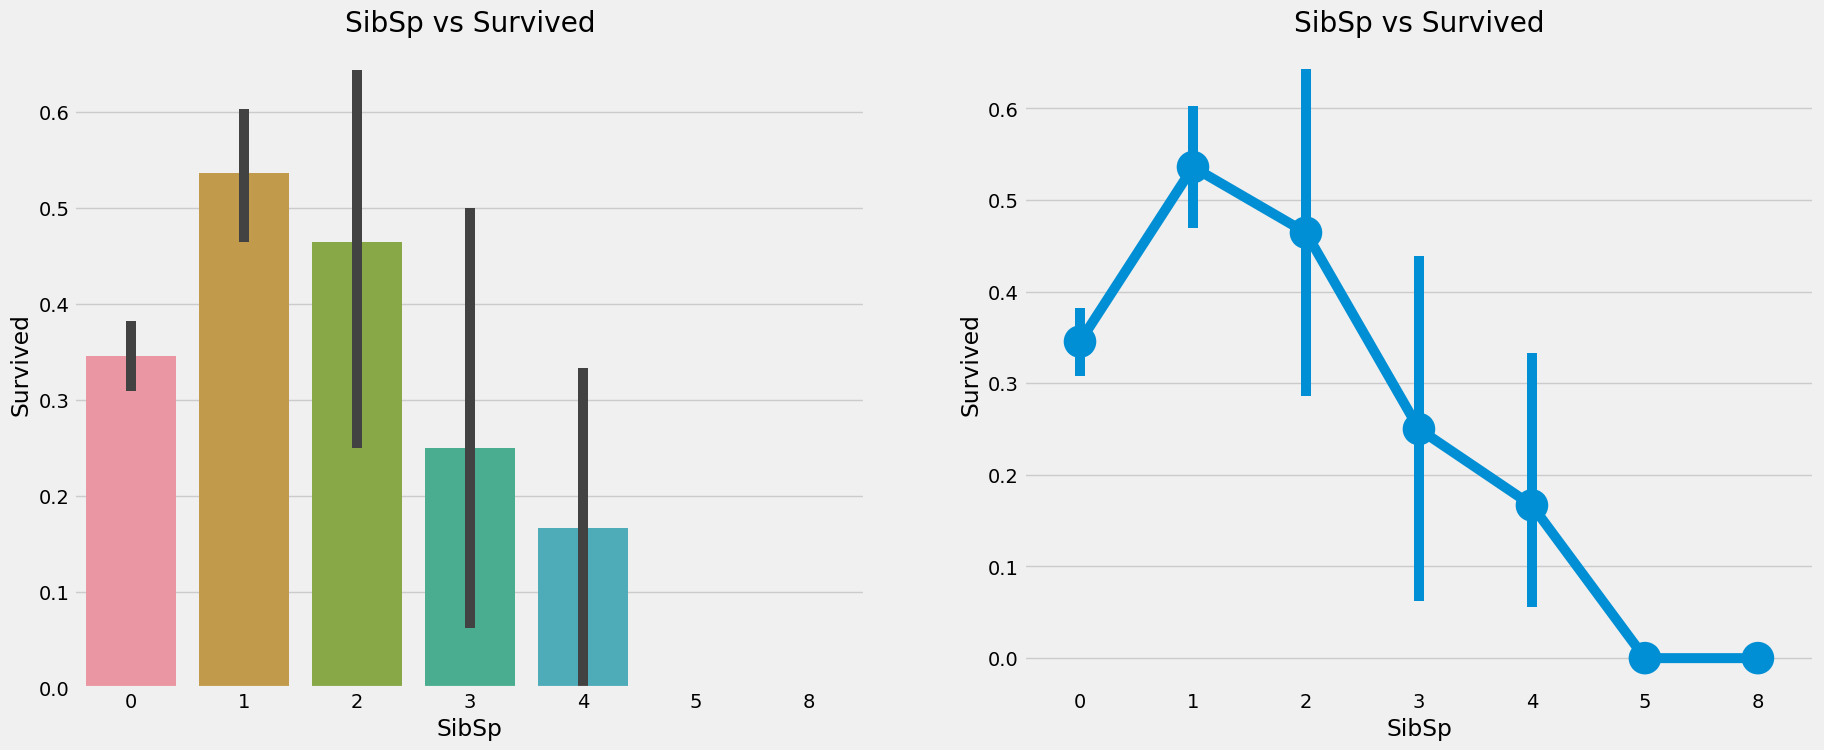

In [68]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot(x="SibSp", y="Survived", data=data, ax=ax[0])
ax[0].set_title("SibSp vs Survived")
sns.pointplot(x="SibSp", y="Survived", data=data, ax=ax[1])
ax[1].set_title("SibSp vs Survived")
plt.close(2)

plt.show()

In [63]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


# Parch
- 부모/자녀

In [64]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


<function matplotlib.pyplot.show(close=None, block=None)>

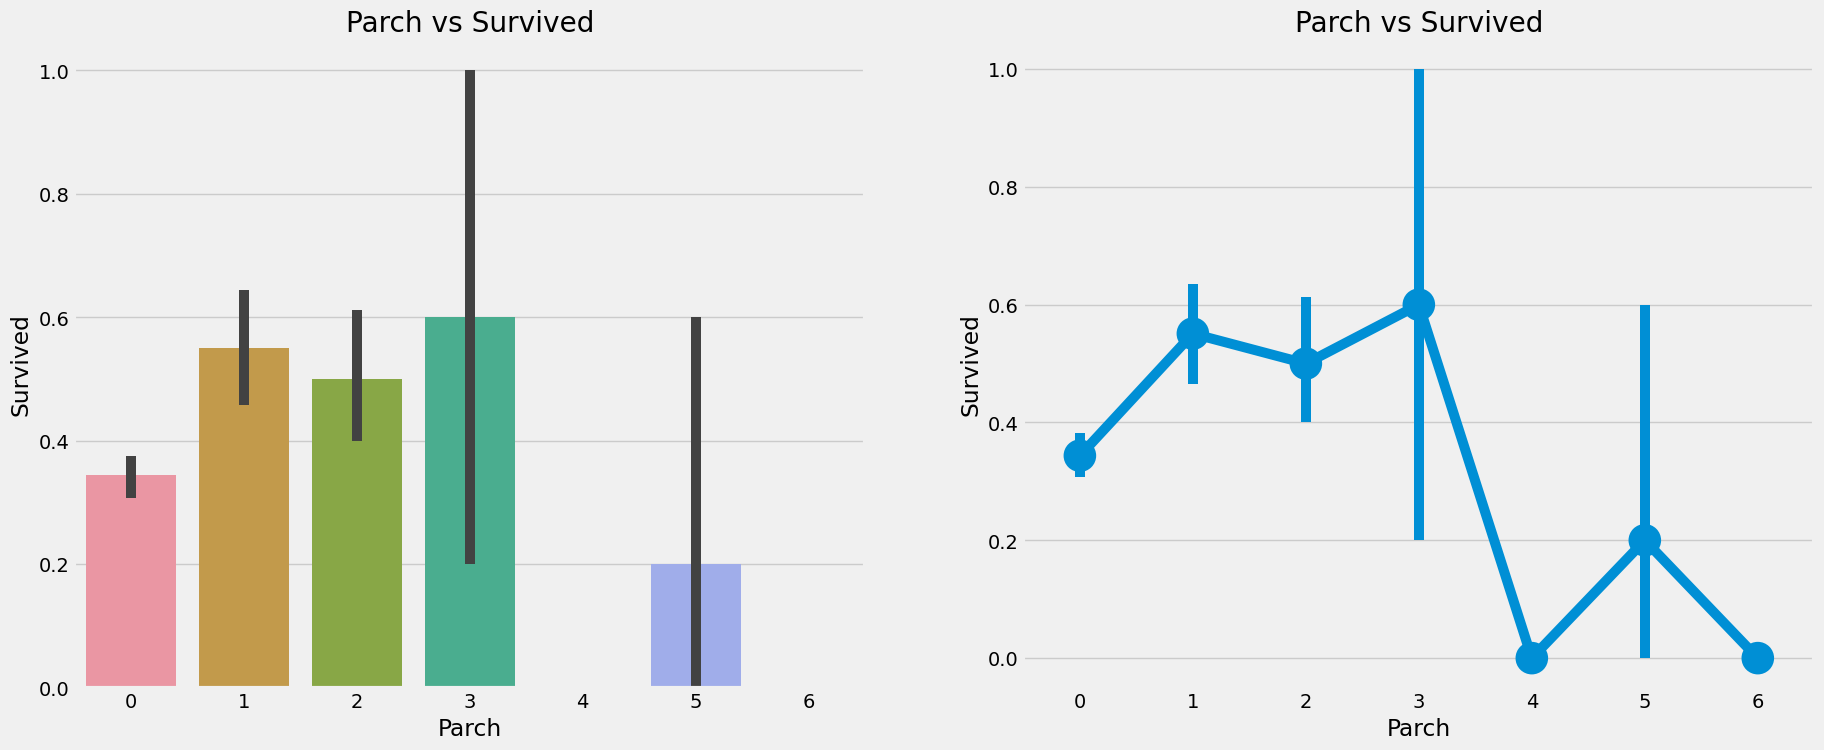

In [67]:
f, ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot(x="Parch", y="Survived", data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')

sns.pointplot(x="Parch", y="Survived", data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')

plt.close(2)
plt.show

# Fare(요금) -> Continous Feature

In [69]:
print('Highest Fare was :', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was : 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


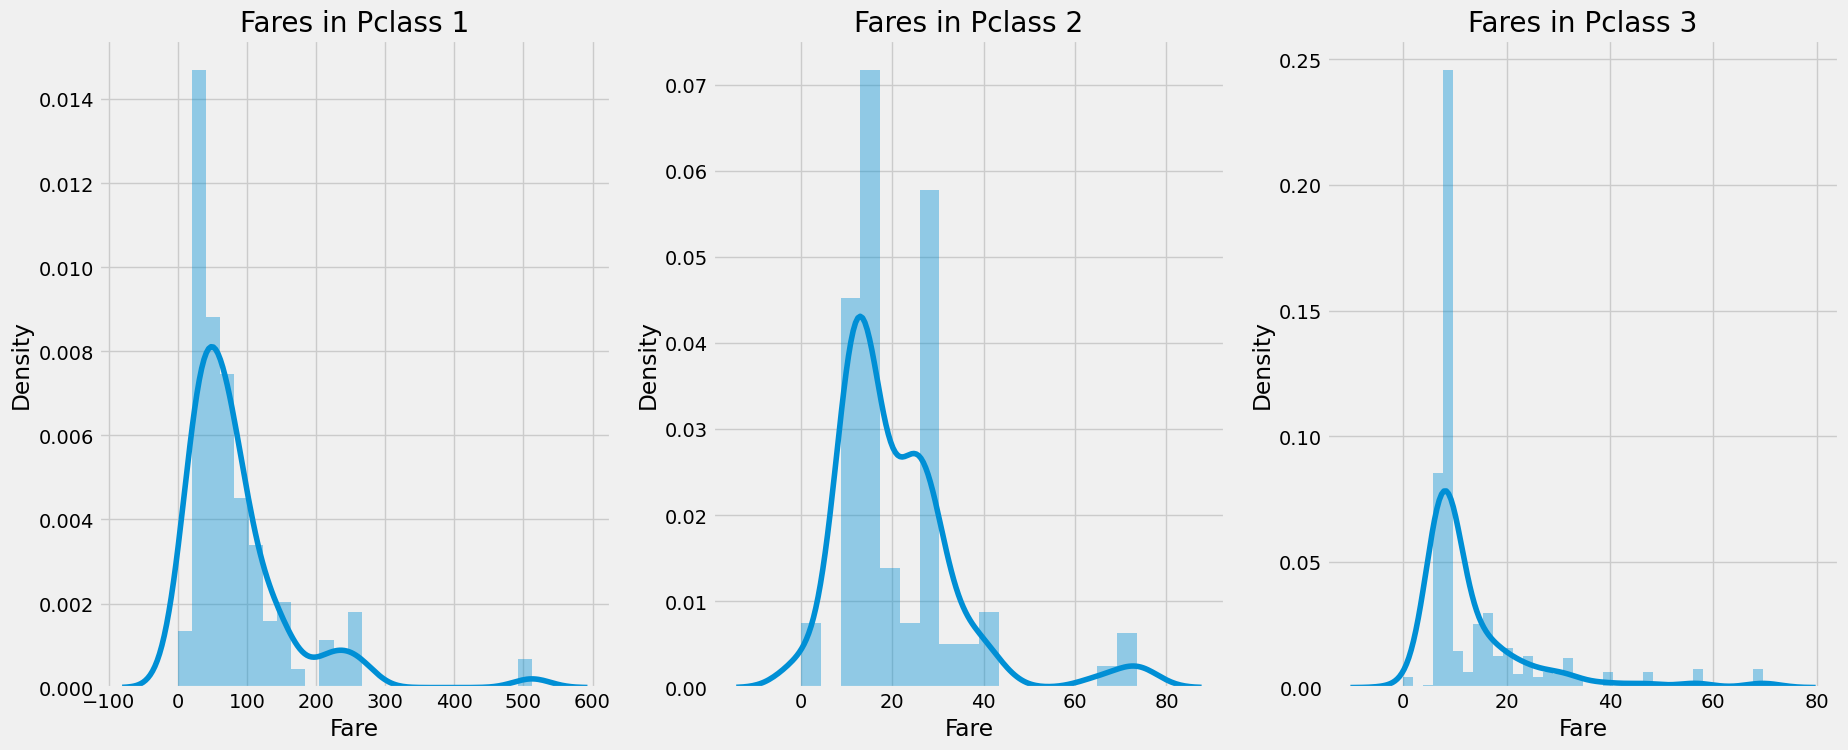

In [70]:
f,ax = plt.subplots(1,3, figsize=(20,8))

sns.distplot(data[data['Pclass'] == 1].Fare, ax = ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass'] == 2].Fare, ax = ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass'] == 3].Fare, ax = ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

# Correlation Between The Features

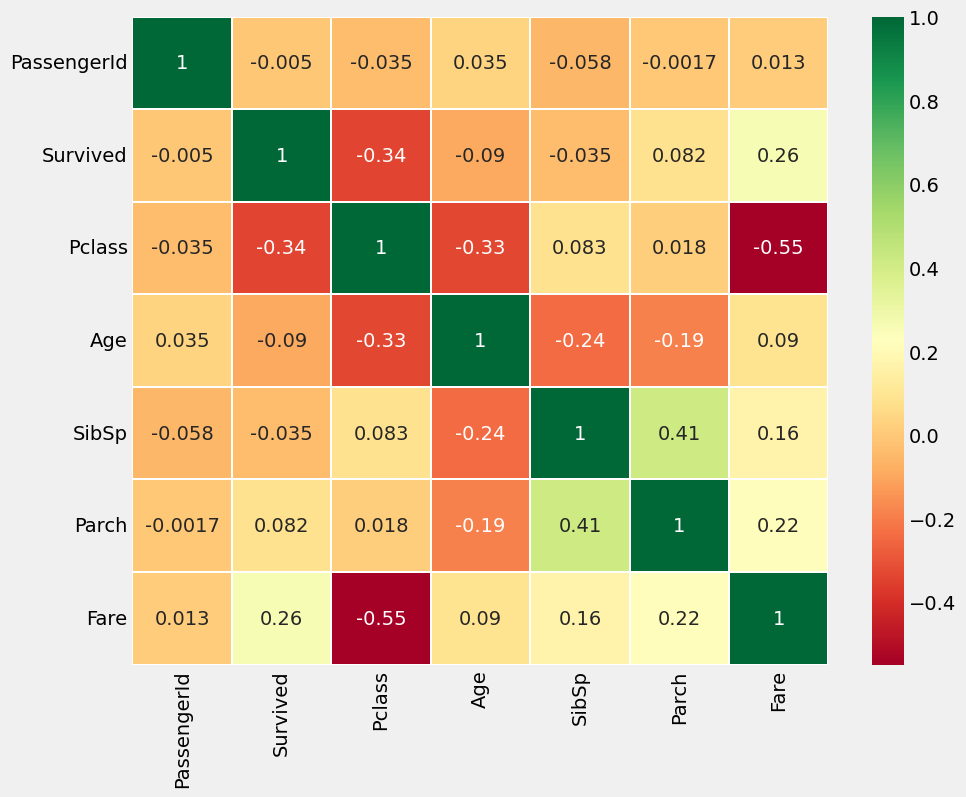

In [73]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

### 히트맵 해석
- 가장 먼저 주목해야 할 것은 알파벳이나 문자열 사이의 상관 관계가 없다는 것이 명백하기 때문에 숫자형 Feature들만 비교한다는 것. 그래프를 이해하기 전에, 상관관계가 정확히 무엇인지 살펴보자

- 긍정적인 상관관계 : 만약 Feature A의 증가가 Feature B의 증가도 영향을 끼치면(이끌면), 그들은 긍정적인(양의) 상관관계가 있다는 것이다. A 값 1은 완벽한 양의 상관관계를 의미한다.

- 부정적인 상관관계 : 만약 Feature A의 증가가 Feature B의 감소로 영향을 끼치면(이끌면), 그들은 부정적인(음의) 상관관계가 있다는 것이다. A 값 -1은 완벽히 음의 상관관계를 의미한다.

- 이제 두 Feature들이 높거나 완벽하게 상관관계에 있어서 한 Feature가 증가하면 다른 Feature도 증가로 이끈다고 치자. 이것은 두 Feature 둘 다 매우 유사한 정보를 포함하고 있고 정보의 차이가 적거나 거의 없다는 것을 의미한다. 
둘 다 거의 동일한 정보를 포함하므로 이를 다중공선성이라고 합니다.

- 그래서 너는 둘 중 하나가 중복되므로 둘 다 사용해야 된다고 생각해? 모델을 훈련하고 만드는 동안, 우리는 훈련 시간을 단축하고 많은 이점을 제공하므로 중복 기능을 제거하도록 노력해야 한다.

- 이제 위의 히트맵을 보면, 우리는 Feature들이 많이 상관관계가 없다는 것을 볼 수 있다. 가장 높은 상관관계는 SibSp과 Parch .i.e 0.41 사이의 것이다. 그래서 우리는 모든 기능을 계속 사용할 것이다. (.i.e는 즉, 다시 말해를 뜻함)